In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_excel('Bank Marketing Data_raw.xlsx')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.y.value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

**General code for generating plots** 

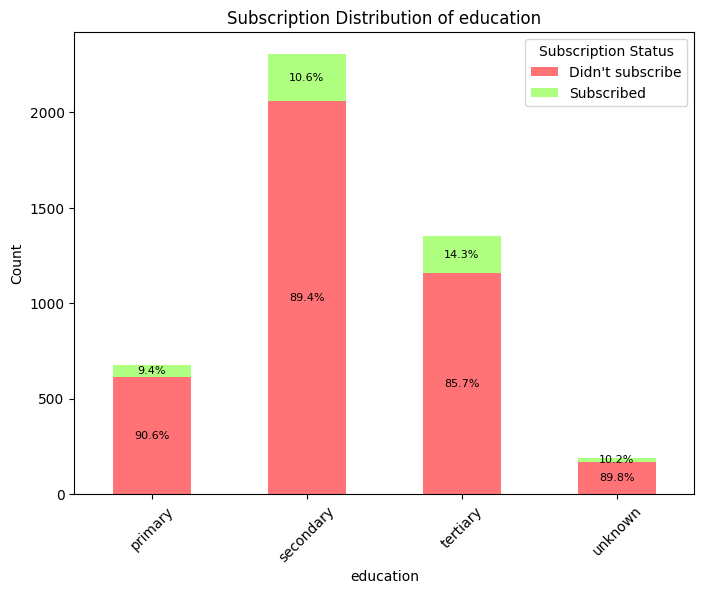

In [6]:
def plot_subscription_rate(df, category_col, subscription_col):

    categories = df[category_col].unique()
    total_count = []
    yes_count = []

    for category in categories:
        df_category = df[df[category_col] == category]
        total_count.append(df_category.shape[0])
        yes_count.append(df_category[df_category[subscription_col] == 'yes'].shape[0])

    no_count = [total - yes for total, yes in zip(total_count, yes_count)]

    # Create a DataFrame for plotting
    data = pd.DataFrame({
        'Didn\'t subscribe': no_count,
        'Subscribed': yes_count
    }, index=categories)

    # Plot as a stacked bar chart
    ax = data.plot(kind='bar', stacked=True, color=['#FF7276', '#AFFF80'], figsize=(8, 6))
    plt.xticks(rotation=45)
    plt.xlabel(category_col)
    plt.ylabel('Count')
    plt.title(f'Subscription Distribution of {category_col}')

    # Add smaller percentage labels to each section of the bars
    for i, (no, yes) in enumerate(zip(no_count, yes_count)):
        total = no + yes
        plt.text(i, no / 2, f"{(no / total * 100):.1f}%", ha="center", va="center", fontsize=8)
        plt.text(i, no + yes / 2, f"{(yes / total * 100):.1f}%", ha="center", va="center", fontsize=8)

    plt.legend(title='Subscription Status')
    plt.show()


plot_subscription_rate(df, 'education', 'y')

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
df.y.value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

**For binary variables**

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


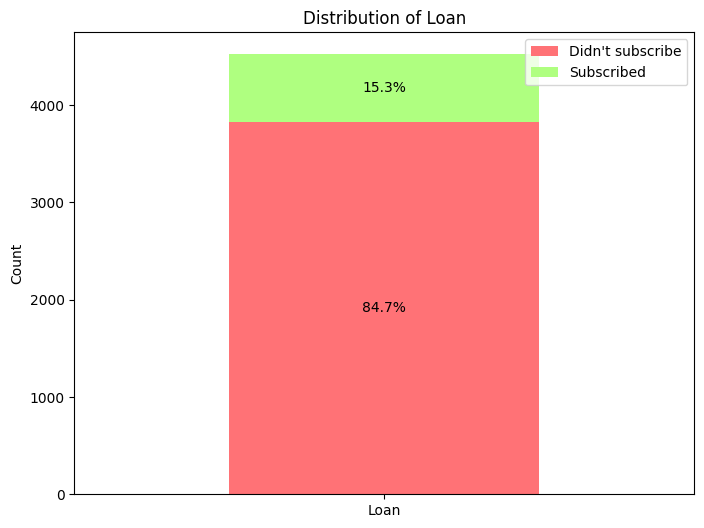

In [ ]:
def plot_stacked_bar(df, column_name):
  
    outcome_counts = df[column_name].value_counts()
    yes_count = outcome_counts.get('yes', 0)  
    no_count = outcome_counts.get('no', 0)    

    data = pd.DataFrame({
        'Didn\'t subscribe': [no_count],
        'Subscribed': [yes_count]
    }, index=[column_name.capitalize()])

    ax = data.plot(kind='bar', stacked=True, color=['#FF7276', '#AFFF80'], figsize=(8, 6))
    plt.xticks(rotation=0)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column_name.capitalize()}')

    total = yes_count + no_count
    plt.text(0, no_count / 2, f"{(no_count / total * 100):.1f}%", ha="center", va="center")
    plt.text(0, no_count + yes_count / 2, f"{(yes_count / total * 100):.1f}%", ha="center", va="center")

    plt.legend()
    plt.show()


plot_stacked_bar(df, 'loan')

Age histogram

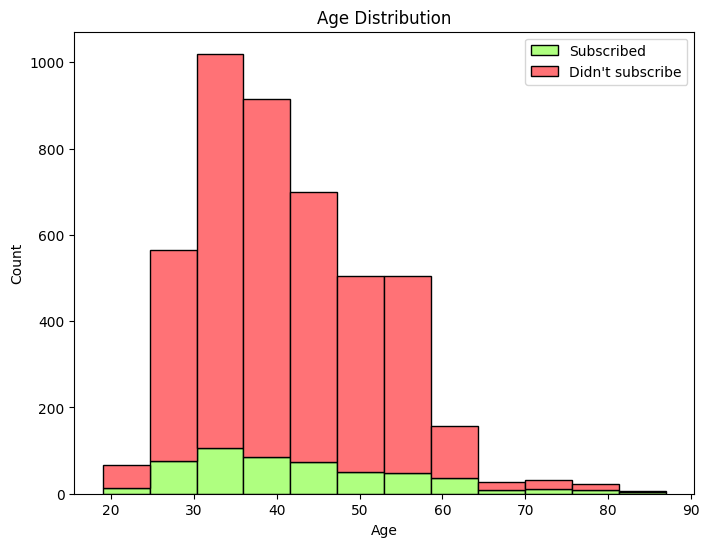

In [9]:
import numpy as np

def plot_age_histogram(df, num_bins=12):  # Add num_bins parameter

    subscribers_df = df[df['y'] == 'yes']
    non_subscribers_df = df[df['y'] == 'no']

    plt.figure(figsize=(8, 6))
    plt.hist([subscribers_df['age'], non_subscribers_df['age']], bins=num_bins,  
             color=['#AFFF80', '#FF7276'], edgecolor='black', 
             stacked=True, label=['Subscribed', 'Didn\'t subscribe'])
    
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.title('Age Distribution')
    plt.legend()
    plt.show()

plot_age_histogram(df)